In [11]:
import pandas as pd

df = pd.read_csv("customer_shopping_data.csv")

df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [13]:
# See all column names
print(df.columns)

# See data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Quick stats for numeric columns
print(df.describe())


Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')
invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64
                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450000
50%       43.000000      3.000000    203.300000
75%       

In [15]:
df['total_sales'] = df['quantity'] * df['price']

In [19]:
# Convert invoice_date to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Extract year and month
df['year'] = df['invoice_date'].dt.year
df['month'] = df['invoice_date'].dt.month

In [21]:
def age_group(age):
    if age < 25:
        return 'Young'
    elif age < 45:
        return 'Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(age_group)


In [23]:
# Total sales by product category
category_sales = df.groupby('category')['total_sales'].sum().sort_values(ascending=False)
print(category_sales)

category
Clothing           1.139968e+08
Shoes              6.655345e+07
Technology         5.786235e+07
Cosmetics          6.792863e+06
Toys               3.980426e+06
Food & Beverage    8.495351e+05
Books              8.345529e+05
Souvenir           6.358247e+05
Name: total_sales, dtype: float64


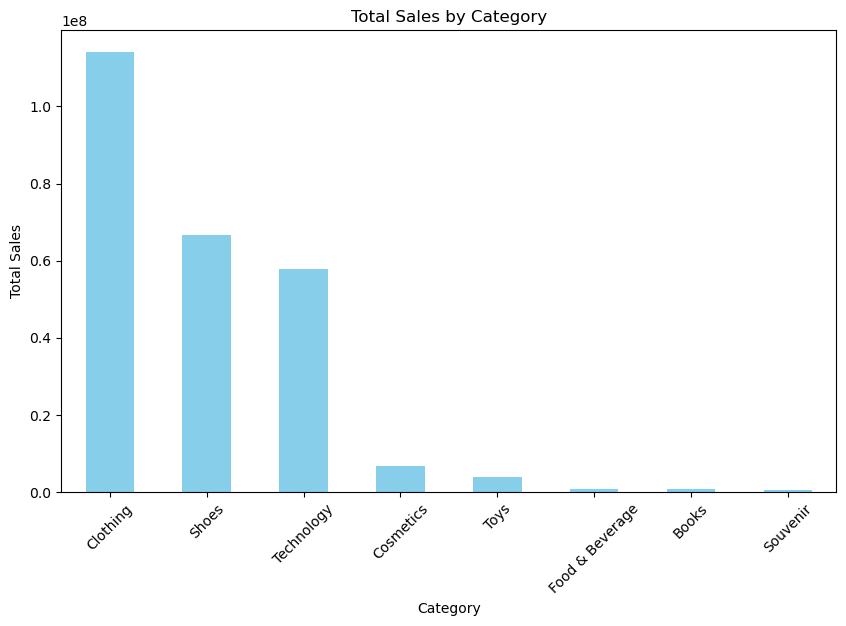

In [25]:
import matplotlib.pyplot as plt

# Bar chart of sales by category
category_sales.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Total Sales by Category')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()


age_group
Senior    1.201696e+08
Adult     9.788216e+07
Young     3.345408e+07
Name: total_sales, dtype: float64


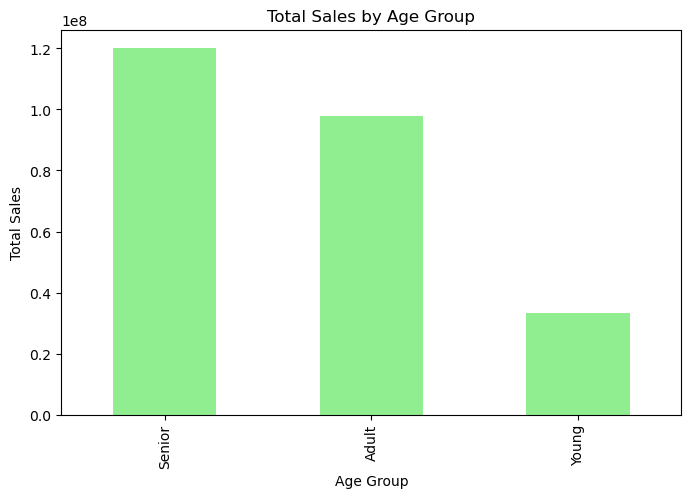

In [27]:
# Total sales by age group
age_sales = df.groupby('age_group')['total_sales'].sum().sort_values(ascending=False)
print(age_sales)

# Optional: bar chart
age_sales.plot(kind='bar', figsize=(8,5), color='lightgreen')
plt.title('Total Sales by Age Group')
plt.ylabel('Total Sales')
plt.xlabel('Age Group')
plt.show()

In [29]:
# Average total sales per invoice
avg_sales_per_invoice = df.groupby('invoice_no')['total_sales'].sum().mean()
print("Average sales per invoice:", round(avg_sales_per_invoice,2))

Average sales per invoice: 2528.79


age_group              Adult       Senior        Young
category                                              
Books              319483.20    393354.60    121715.10
Clothing         43871696.00  54913739.76  15211355.28
Cosmetics         2641964.82   3258329.76    892568.32
Food & Beverage    331937.64    400147.30    117450.11
Shoes            25828916.12  31544935.20   9179600.15
Souvenir           250412.04    297871.62     87540.99
Technology       23113650.00  27468000.00   7280700.00
Toys              1524096.00   1893176.32    563153.92


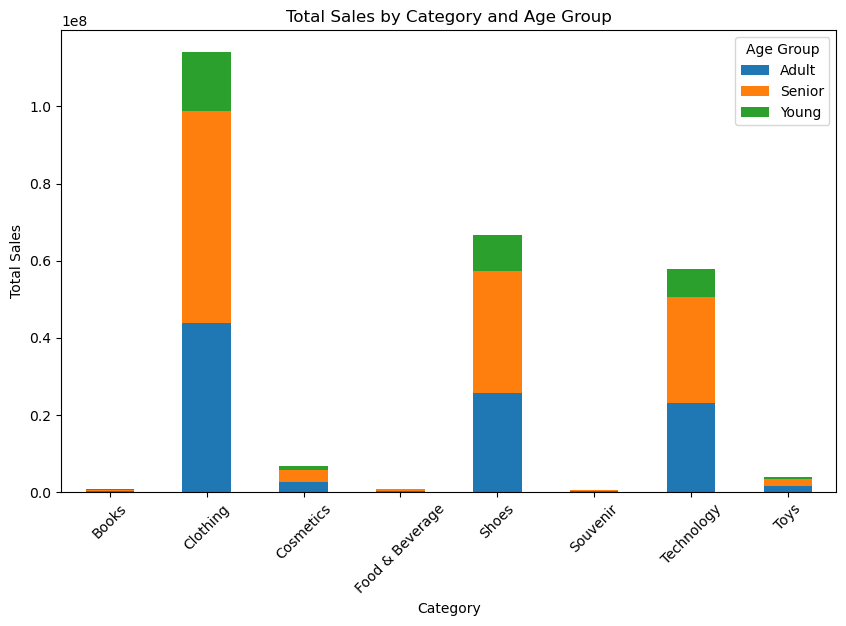

In [31]:
# Total sales by category and age group
category_age_sales = df.groupby(['category', 'age_group'])['total_sales'].sum().unstack()
print(category_age_sales)

# stacked bar chart
category_age_sales.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Total Sales by Category and Age Group')
plt.ylabel('Total Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()


shopping_mall
Mall of Istanbul     50872481.68
Kanyon               50554231.10
Metrocity            37302787.33
Metropol AVM         25379913.19
Istinye Park         24618827.68
Zorlu Center         12901053.82
Cevahir AVM          12645138.20
Viaport Outlet       12521339.72
Emaar Square Mall    12406100.29
Forum Istanbul       12303921.24
Name: total_sales, dtype: float64


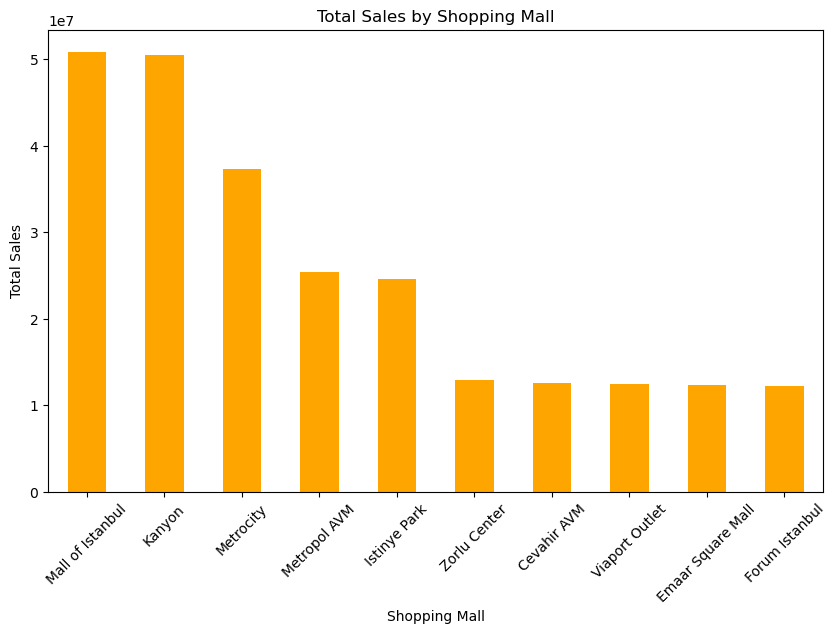

In [33]:
# Total sales by shopping mall
mall_sales = df.groupby('shopping_mall')['total_sales'].sum().sort_values(ascending=False)
print(mall_sales)

# bar chart
mall_sales.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Total Sales by Shopping Mall')
plt.ylabel('Total Sales')
plt.xlabel('Shopping Mall')
plt.xticks(rotation=45)
plt.show()


payment_method
Cash           1.128322e+08
Credit Card    8.807712e+07
Debit Card     5.059643e+07
Name: total_sales, dtype: float64


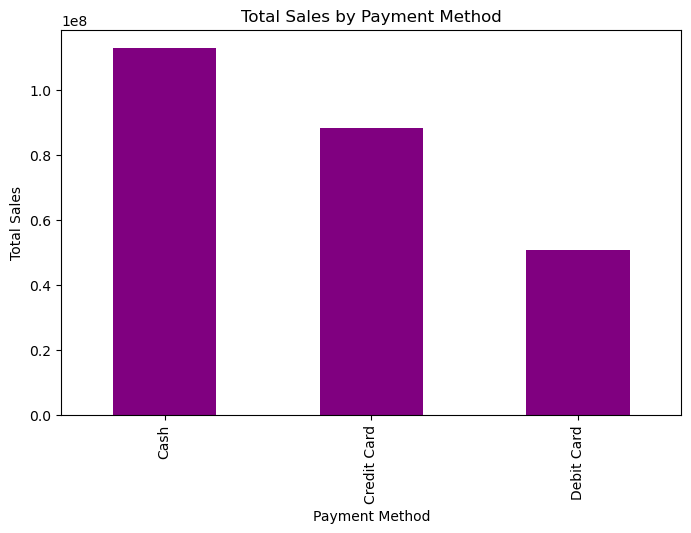

In [35]:
# Total sales by payment method
payment_sales = df.groupby('payment_method')['total_sales'].sum().sort_values(ascending=False)
print(payment_sales)

# bar chart
payment_sales.plot(kind='bar', figsize=(8,5), color='purple')
plt.title('Total Sales by Payment Method')
plt.ylabel('Total Sales')
plt.xlabel('Payment Method')
plt.show()
